In [1]:
import pandas as pd
df = pd.read_csv("shampoo.csv",header = 0, parse_dates = [0])

In [2]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [3]:
df.shape

(36, 2)

<AxesSubplot:>

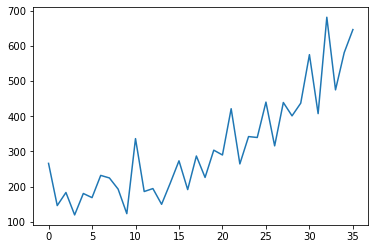

In [4]:
df['Sales'].plot()

Trend is polynomial, D =2.

# Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

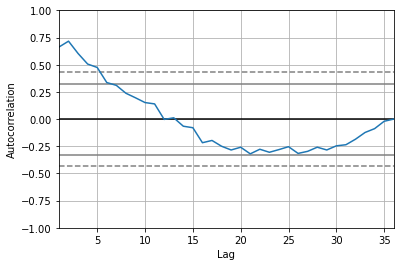

In [5]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

p = AR model lags
d =  differencing
q = MA lags



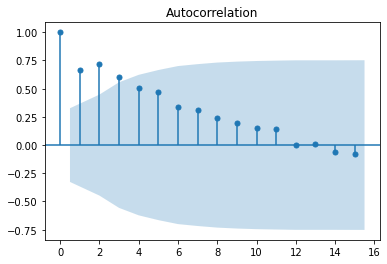

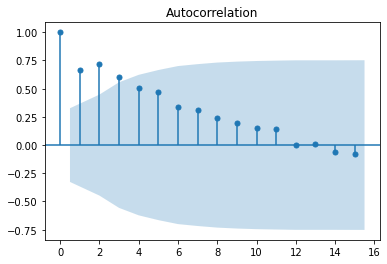

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df["Sales"],lags = 15)


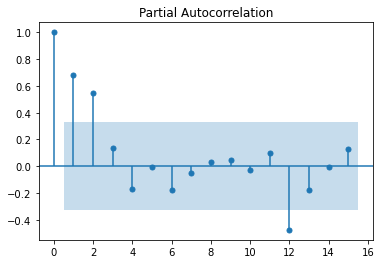

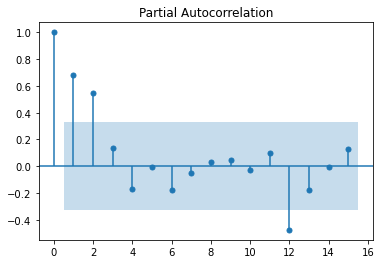

In [7]:
plot_pacf(df['Sales'], lags = 15)

From above  PACF graph we can see, for  AR model lags p=2 is the point  from where there is a sudden drop and points come into confiedence interval.
From ACF graph we can see, for MA model q =5 is the point  fromwhere  points come into confiedence interval.

* AR model works well with PACF and MA model works well with ACF.

In [16]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(df['Sales'],order = (2,2,5))
model_fit = model.fit()

In [17]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 2, 5)   Log Likelihood                -189.635
Date:                Sat, 16 Jul 2022   AIC                            395.269
Time:                        14:29:02   BIC                            407.480
Sample:                             0   HQIC                           399.434
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9079      0.246     -7.741      0.000      -2.391      -1.425
ar.L2         -0.9544      0.219     -4.363      0.000      -1.383      -0.526
ma.L1         -0.0681     19.825     -0.003      0.997     -38.925      38.789
ma.L2         -1.8461      2.770     -0.666      0.505      -7.276       3.583
ma.L3          0.3024     19.772      0.015      0.988     -38.449      39.054
ma.L4          0.9883      2.802      0.353      0.724      -4.504       6.480
ma.L5         -0.1280      0.339     -0.377      0.706      -0.793       0.537
sigma2      2696.5453      0.014   1.95e+05      0.000    2696.518    2696.572
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.39   Prob(JB):                         0.92
Heteroskedasticity (H):               0.94   Skew:                            -0.01
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.81e+22. Standard errors may be unstable.
"""

# SARIMA

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [20]:
df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv',header=0,parse_dates=[0])

In [21]:
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [22]:
df.shape

(96, 2)

In [23]:
df.index = df['Month']

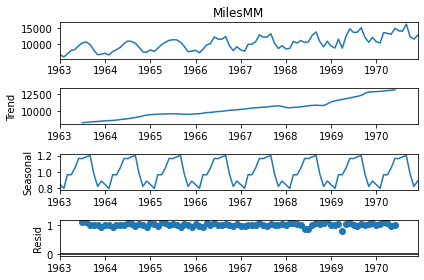

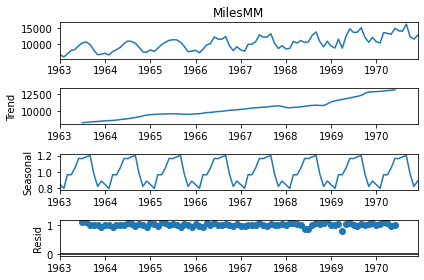

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_a = seasonal_decompose(df['MilesMM'],model = 'multiplicative')
result_a.plot()

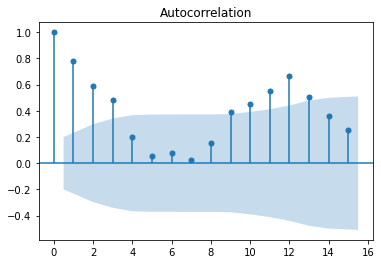

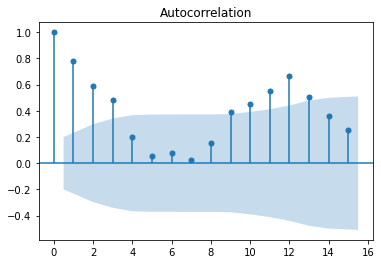

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df["MilesMM"],lags = 15)

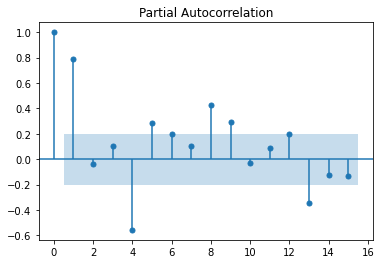

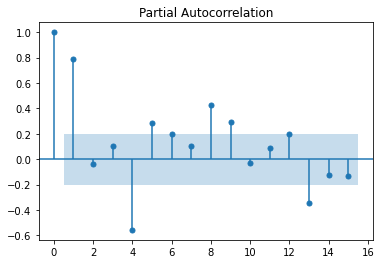

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df["MilesMM"],lags = 15)

In [ ]:
model = SARIMAX(df['MilesMM'],order = (2,1,4)(1,1,1,12))